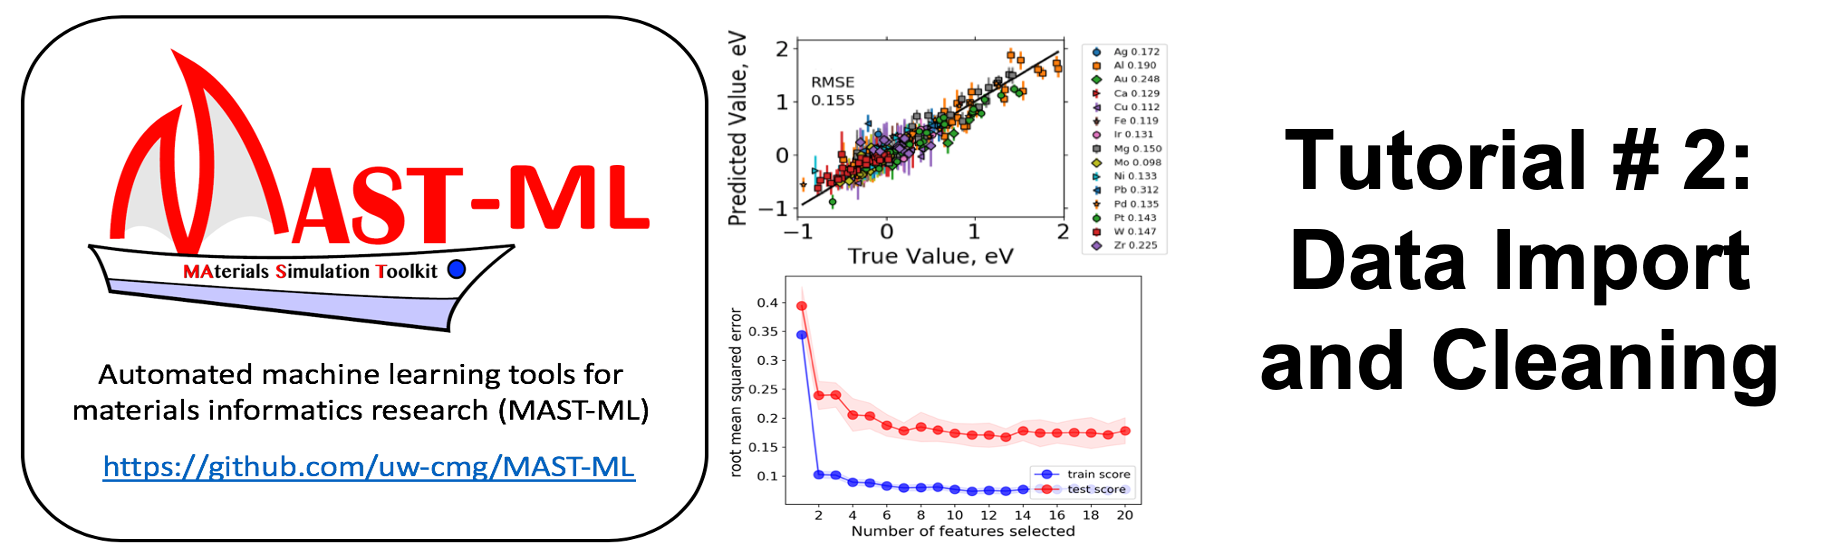

# Welcome to the second MAST-ML tutorial notebook, 

# Data Import and Data Cleaning with MAST-ML! 

## In this notebook, we will learn different ways to download and import data into a MAST-ML run: 

1. [Set up MAST-ML on Colab and begin session](#task1)
2. [Import model datasets from scikit-learn](#task2)
3. [Conduct different data cleaning methods](#task3)
4. [Import and prepare a real dataset that is stored locally](#task4)
5. [Download data from various materials databases](#task5)


## Task 1: Set up MAST-ML on Colab and begin session <a name="task1"></a>

If you are working on Google Colab and need to install MAST-ML, 
begin by cloning the relevant branch of MAST-ML to the Colab session
and install the needed dependencies:

In [ ]:
!git clone --single-branch --branch dev_Ryan_2020-12-21 https://github.com/uw-cmg/MAST-ML
!pip install -r MAST-ML/requirements.txt

Sync your Google drive to Colab so that we can save MAST-ML results to our Google
Drive. If we save to the Colab session, the data will be deleted when the session 
ends.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

We need to add the MAST-ML folder to our sys path so that python can find the modules

In [ ]:
import sys
sys.path.append('MAST-ML')

Here we import the MAST-ML modules used in this tutorial

In [1]:
from mastml.mastml import Mastml
from mastml.datasets import SklearnDatasets, LocalDatasets, MatminerDatasets, FigshareDatasets, FoundryDatasets
from mastml.data_cleaning import DataCleaning
import numpy as np
from copy import copy

Here, we set the name of the savepath to save MAST-ML results to, and initialize
our MAST-ML run

When the above command is run, a new folder with the name designated SAVEPATH is created.
This is where all of the output for the current MAST-ML run will be saved to.
Note that you can perform multiple runs with the same folder name, and the current datetime
will be appended to the name so that no data is lost or overwritten.

In [2]:
SAVEPATH = 'drive/MyDrive/MASTML_tutorial_2_DataImport'

mastml = Mastml(savepath=SAVEPATH)
savepath = mastml.get_savepath

drive/MyDrive/MASTML_tutorial_2_DataImport not empty. Renaming...


## Task 2: Import model datasets from scikit-learn <a name="task2"></a>

Let's begin by first showing how to load some common model datasets that
come with the scikit-learn package. As in the first tutorial, we use the SklearnDatasets module 
to load in the data. There are a few regression datasets that come with scikit-learn, such as
the Boston housing data, the diabetes dataset, and the Friedman data set. For now,
let's once again load in the Boston housing dataset.

In [3]:
X, y = SklearnDatasets(as_frame=True).load_boston()

Let's quickly examine the X data so we know what we're dealing with:

In [4]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Task 3: Conduct different data cleaning method <a name="task3"></a>

We have 506 data points (houses) and 13 columns (features). From inspecting the dataset,
we can see there are no missing values in the dataset. However, many datasets in the real
world aren't this neat and tidy, and may contain values that are missing. To illustrate
how we can go about cleaning our data, let's make the first few rows of values in the AGE
column not-a-number (NaN), which is what they will be if you import a dataset with missing values:

In [5]:
X['AGE'][0:4] = np.nan
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,NaN,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,NaN,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,NaN,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,NaN,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


We can now see that the first four rows of the 'AGE' column are NaN instead
of their original values. Let's clean the data using a few different methods
in the DataCleaning class. First, let's copy the X data so we can more easily
see the changes we make to each dataset

In [6]:
X1row = X1col = X2 = X3 = X4 = copy(X)

There are few different ways we can clean the data: (1) we can simply 
remove the data points that have missing values, (2) we can perform
data imputation to replace the missing values with the mean (or median) value

Let's start with simply removing the problematic data points:

In [7]:
X1row, y1 = DataCleaning().remove(X=X1row, 
                                  y=y, 
                                  axis=0)
X1row

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


What we can see is that we now have 502 rows instead of the original 506. 
The four data points that had missing values in the AGE column have been removed.

Note that we could have instead removed the column (feature) containing
the missing values, as in our case all of the missing values were part of
a single feature:

In [8]:
X1col, y1 = DataCleaning().remove(X=X1col, 
                                  y=y, 
                                  axis=1)
X1col

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,2.3889,1.0,273.0,21.0,393.45,6.48


What we can see is that we now have all 506 of our original data points,  
but we now just have 12 of the 13 features as the AGE feature has been removed.

There are smarter things we can do besides simply removing the problematic
data points. Here, let's use the imputation process to replace the missing
values with the mean value of the feature column

In [9]:
X2, y2 = DataCleaning().imputation(X=X2, 
                                   y=y, 
                                   strategy='mean')
X2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,68.621315,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,68.621315,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,68.621315,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,68.621315,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1.0,273.0,21.0,393.45,6.48


What we can see is that we now have all 506 of our original data points and 
all 13 of our feature columns, and the first four rows of the AGE feature
now contain the average value for that feature.

Finally, let's do imputation again but use the median instead of 
the mean value

In [10]:
X3, y3 = DataCleaning().imputation(X=X3, 
                                   y=y, 
                                   strategy='median')
X3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,77.7,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,77.7,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,77.7,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,77.7,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


What we can see is that we now have all 506 of our original data points and 
all 13 of our feature columns, and the first four rows of the AGE feature
now contain the median value for that feature.

MAST-ML provides a convenient method for evaluating a data cleaning routine,
and saving the output to a dedicated folder in your MAST-ML output directory
Let's do imputation again on our final remaining dataset and examine what's
contained in the saved output:

In [11]:
X4, y4 = DataCleaning().evaluate(X=X4, 
                                 y=y, 
                                 method='imputation', 
                                 savepath=savepath, 
                                 strategy='mean')

Check your MAST-ML save directory: you'll see a new folder starting with the name "DataCleaning_..."
In here, there are numerous Excel data files and a histogram plot. Below is a brief overview
of what is contained in these files. One useful visualization is the histogram of the target data
you are trying to fit machine learning models to

data_cleaned.xlsx: the cleaned dataset

data_columns_with_strings: listed column names that contain string entries. Empty for our dataset

data_original.xlsx: the original dataset prior to cleaning

data_outliers_all.xlsx: a summary of the possible outlier points for each feature column

data_outliers_summary.xlsx: a summary showing, for each data point, the number of feature values which may be outliers

histogram_target_values_statistics.xlsx: key summary statistics of the distribution of y target data

histogram_target_values.png: histogram plot of the y target data with some basic statistics included

histogram_target_values.xlsx: the raw data used to make the histogram plot of the same name


### DataCleaning directory with files:

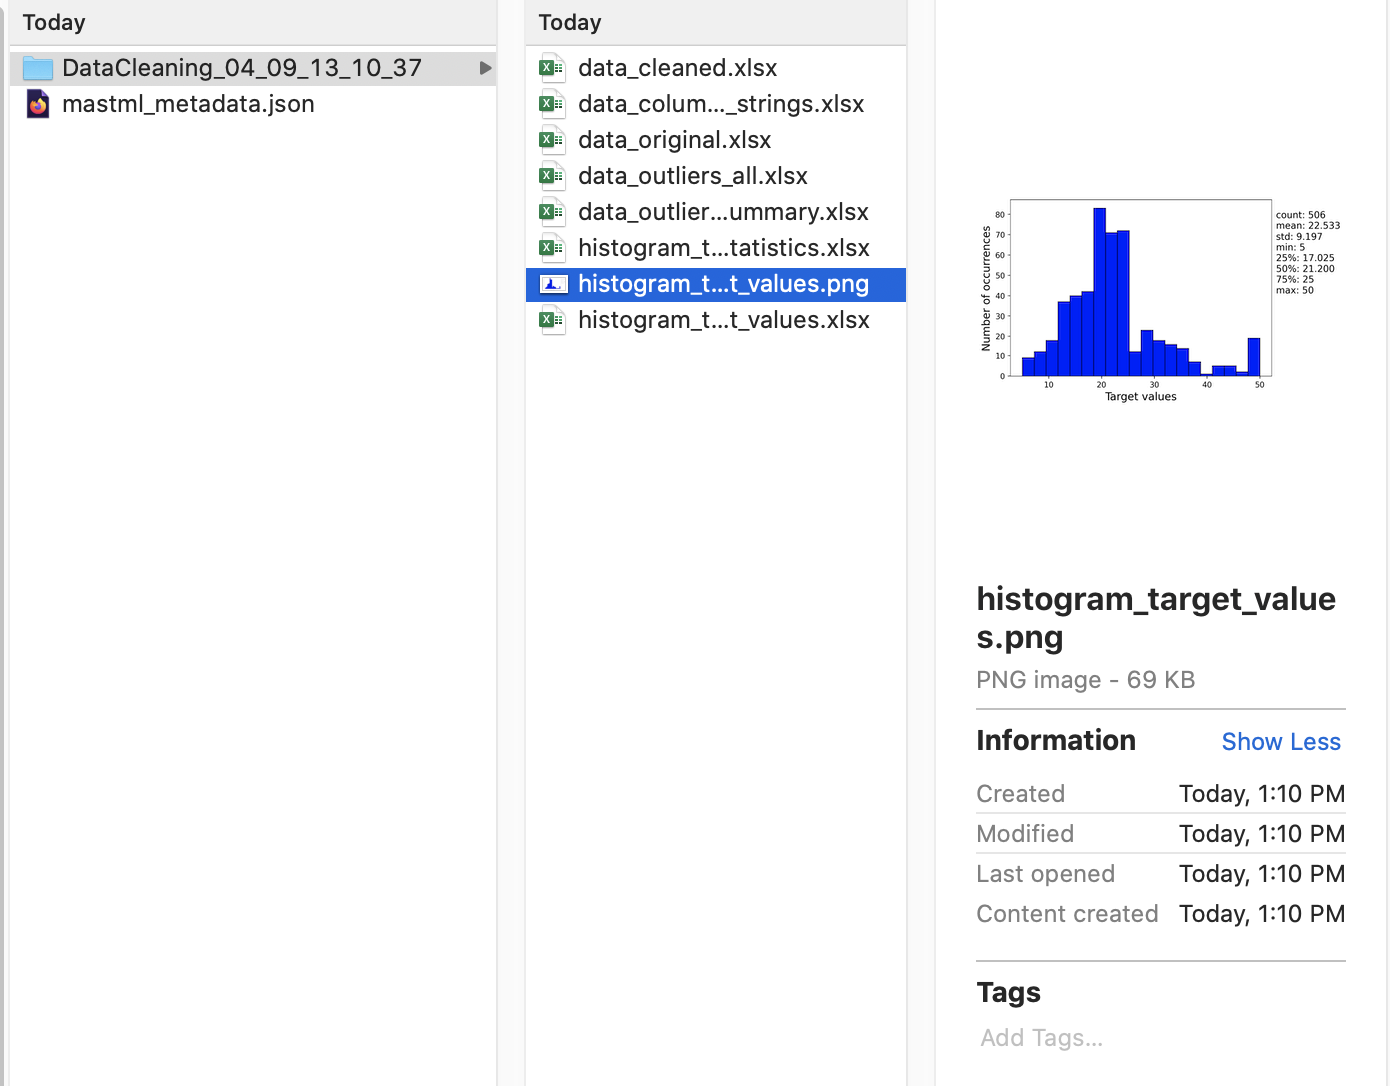

### Histogram of target values:

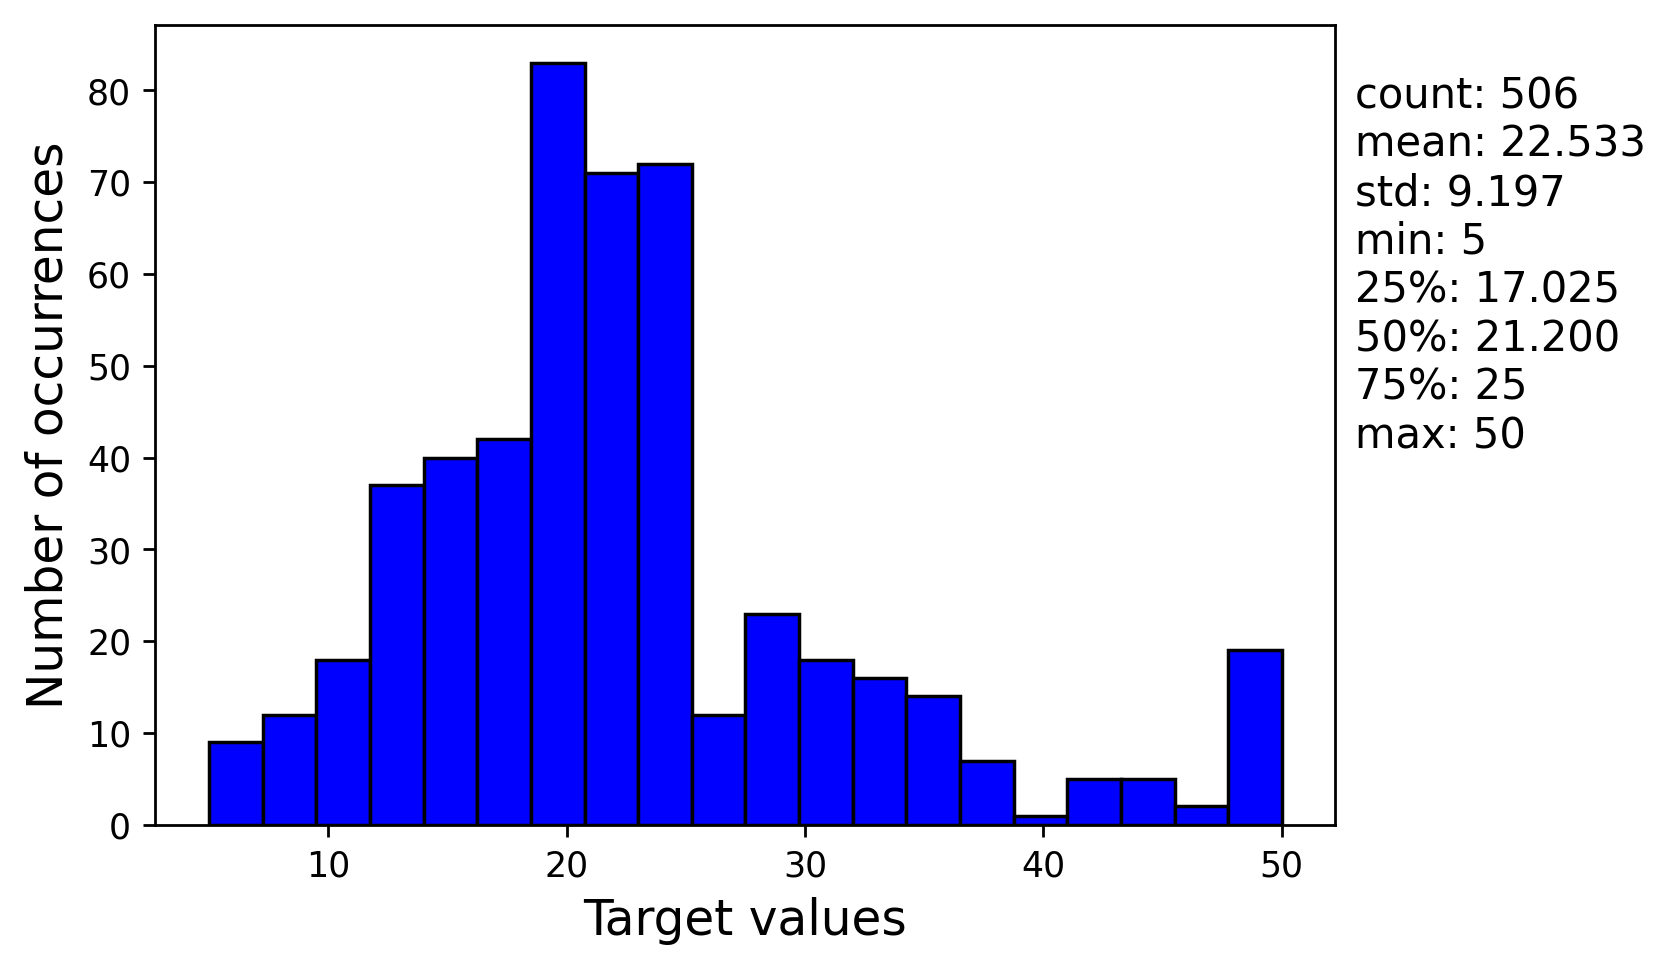

## Task 3: Import and prepare a real dataset that is stored locally  <a name="task3"></a>

Next, we want to move away from the model datasets contained in scikit-learn and learn how to import
a real materials science dataset. As part of MAST-ML, we have included a dataset in the mastml/data
folder. The data is contained there as diffusion_data_selectfeatures.xlsx. This dataset contains
calculated migration energies of solute alloys in metal host materials.

Here, we use the LocalDatasets module to load in the above mentioned diffusion dataset. 

We first need to denote the column name of the target (y-data)

In addition, there are columns in the data file not used as features or target. We need to
list them here in the parameter extra_columns

In [ ]:
target = 'E_regression.1'

extra_columns = ['Material compositions 1', 'Material compositions 2', 'Hop activation barrier', 'E_regression']

Here, we make an instance of our LocalDatasets class. It needs a few parameters:
   
file_path: where the data is stored

target: the column name of the y-data

extra_columns: list containing extra columns in the data file not used for fitting

group_column: column name denoting group labels (only used for LeaveOutGroup CV)
   
testdata_columns: column names denoting left-out data to evaluate using best
     model from CV tests. This is manual way to leave out data. Can also be done
     automatically using nested CV (we will do this in later tutorials)
   
as_frame: whether to return data as dataframe. Want this to be true.

We load the data with the load_data() method

In [ ]:
d = LocalDatasets(file_path='../mastml/data/diffusion_data_selectfeatures.xlsx', #'MAST-ML/mastml/data/figshare_7418492/All_Model_Data.xlsx'
                  target=target, 
                  extra_columns=extra_columns, 
                  group_column='Material compositions 1',
                  testdata_columns=None,
                  as_frame=True)

data_dict = d.load_data()

Let's look at the contents of the loaded data_dict

We see there are 5 keys:
   
X: the X feature matrix (used to fit the ML model)
   
y: the y target data vector (true values)
   
X_extra: matrix of extra information not used in fitting (i.e. not part of X or y)
   
groups: vector of group labels (here, a list of host elements)

X_testdata: matrix or vector of left out data. Empty for our current example.

In [ ]:
data_dict.keys()

Let's assign each data object to its respective name

In [ ]:
X = data_dict['X']
y = data_dict['y']
X_extra = data_dict['X_extra']
groups = data_dict['groups']
X_testdata = data_dict['X_testdata']

Let's have a look at the X feature matrix. It contains 287 elemental features.
There are a total of 408 diffusion activation barriers used for fitting

In [ ]:
X

Let's look at the groups list. The groups denote the element identity of the host metal

In [ ]:
groups

Let's examine the extra data not used in fitting. Note that the y-data we are 
fitting to are equal to the E_regression values listed here, minus the E_regression
value of the pure material. Material compositions 1 are the host elements, which
are the same values used in the groups list. Material compositions 2 are the solute
elements (i.e. the diffusing impurity in the host material)

In [ ]:
X_extra

Finally, we can look at our manually left-out data set. For this tutorial we
have left this blank, but we will make use of it in a future tutorial

In [ ]:
X_testdata

## Task 4: Download and import data from various materials databases  <a name="task4"></a>

Next, let's download some datasets from remote materials databases, then import
them for use in MAST-ML

Here, we will download a materials dataset of steel alloy yield strengths from the 
matminer datasets repository:

In [ ]:
df = MatminerDatasets().download_data(name='steel_strength')

The output of downloading this data is a pandas dataframe. If we know which columns
correspond to X, y, X_extra, and so on, we can designate those fields here through
pandas commands. Alternatively, we can import the just-saved steel_strength.xlsx file
using the LocalDatasets class just like we did in the previous task:

In [ ]:
target = 'yield strength'
extra_columns = ['formula', 'tensile strength', 'elongation']

d = LocalDatasets(file_path='steel_strength.xlsx', 
                  target=target, 
                  extra_columns=extra_columns, 
                  group_column=None,
                  testdata_columns=None,
                  as_frame=True)

# Load the data with the load_data() method
data_dict = d.load_data()

# Designate the X, y and X_extra data 
X = data_dict['X']
y = data_dict['y']
X_extra = data_dict['X_extra']

Let's have a look at the X feature matrix for this data. 
The X features are the atom fractions of different elements
in each steel alloy

In [ ]:
X

Let's have a look at the y target data. They data are yield strengths (in MPa) for each alloy

In [ ]:
y

There are many other datasets besides this steel strength dataset
available on the matminer repository. Information on these other
datasets, and the names used to query them, can be output using:

In [ ]:
MatminerDatasets().get_available_datasets()

As one last example, let's look at how to download datasets that are 
hosted on Figshare. To use the Figshare data import, we need to 
first install the python package to query Figshare datasets:

In [ ]:
!git clone https://github.com/cognoma/figshare.git
import sys
sys.path.append('figshare')

Now we can download a dataset from Figshare. The diffusion dataset
we examined earlier is hosted on Figshare, with article ID number 7418492. 
Let's download it to our working environment:

In [ ]:
FigshareDatasets().download_data(article_id='7418492')

We can now see the new folder "figshare_7418492" has been downloaded,
and within it is the data file "All_Model_Data.xlsx". This is the same
file we imported earlier from mastml/data when demonstrating the use
of the LocalDatasets class. As with this file or other datasets downloaded
from Figshare or other remote datasets, after downloading the data files
you can import them into MAST-ML using the LocalDatasets class as we 
learned in this tutorial.

You've now completed your second MAST-ML tutorial notebook! Now that you're more familiar with working with datasets
within MAST-ML, the next thing for us to do is look at feature engineering in more detail. 

The next example in this notebook series is titled MASTML_Tutorial_3_FeatureEngineering.ipynb, and will guide you through the process
of generating, preprocessing, and selecting features for a particular model and data split test.